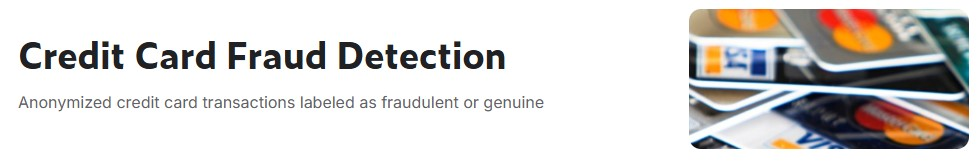

## Objetivo
Esse notebook tem como objetivo propor um modelo para detecção de fraude no uso do cartão de crédito, os dados utilizados estão disponíveis na plataforma [Kaggle](https://www.kaggle.com/) na página especifíca [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). Compete desenvolvemo um modelo de classificação binário capaz de informar se determinada transação futura se mostrar fraudulenta com base nos dados apresentados 

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd

In [2]:
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do pandas: {pd.__version__}')

Versão do numpy: 2.2.3
Versão do pandas: 2.2.3


## Importados os dados

In [3]:
#Caminho dos dados
push = "E:\\Credit_Card_Fraud_Detection\\dados_reduzidos.csv"

#DataFrame pandas
dados = pd.read_csv(push)
dados

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,155634.0,-1.059052,1.283853,0.795816,-1.033538,0.431705,-0.239685,0.625447,0.399604,-0.537971,...,-0.050855,-0.137627,-0.381451,0.534157,0.771628,0.678178,0.073496,0.044996,10.00,0
1,166926.0,-1.184767,0.827866,1.702823,-0.579561,-0.010073,0.401399,0.394132,0.373908,-0.270507,...,-0.129313,-0.301196,-0.039028,0.747231,0.344724,-0.506179,-0.308795,-0.244037,49.99,0
2,40952.0,1.197044,-0.042193,0.531823,0.600644,-0.595569,-0.596424,-0.193877,-0.089134,0.364887,...,0.002979,-0.046011,-0.074067,0.061933,0.362996,0.365931,-0.024848,0.021900,39.95,0
3,57440.0,1.095221,-0.182904,1.202517,1.183669,-1.019751,0.014839,-0.720223,0.270024,0.692400,...,0.172898,0.549449,-0.104292,0.329019,0.438143,-0.273832,0.054825,0.026099,22.14,0
4,146231.0,2.217553,-1.564356,-1.032087,-1.761391,-1.018829,0.119015,-1.323164,0.055963,-1.297859,...,-0.121929,0.035937,0.205571,0.193469,-0.238440,-0.200387,0.007699,-0.050173,45.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,78725.0,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,0.290273,...,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,60.00,1
980,95559.0,-16.308650,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,...,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,1.63,1
981,55279.0,-5.753852,0.577610,-6.312782,5.159401,-1.698320,-2.683286,-7.934389,2.373550,-3.073079,...,1.177852,0.175331,-1.211123,-0.446891,-0.405520,-0.165797,1.505516,0.359492,1.00,1
982,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,...,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00,1


In [4]:
# Tamanho da base de dados
print(f'Número de linhas: {dados.shape[0]}')
print(f'Número de Colunas: {dados.shape[1]}')

Número de linhas: 984
Número de Colunas: 31


In [5]:
#Verificando a existe valores null, se existe algum elemento que a informação na base de dados que não foi informando
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22  V2

Na base de dados, nem um das variáveis possue valores faltantes ou de tipos diferentes. Isso é indicado pela coluna de contagem de valores null não apesentarem qualquer valor assim como em todas as colunas os dados são do mesmo tipo,  float64 ou int64.

A coluna com `Class` representa se a transação realizada foi classificada como fraudulenta ou legítima, sendo a classíficação da seguinte forma:
> 0 - **para transação não fraudulenta, legítima.**  
> 1 - **para transação fraudulenta**

In [6]:
#Contagem de valores absolutos na coluna Class
dados['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [7]:
#Contagem de valores relativos na coluna Class
dados['Class'].value_counts(normalize=True)*100

Class
0    50.0
1    50.0
Name: proportion, dtype: float64

De acordo como as informações geradas nas células de código acima podemos observa que existem um total de $284807$ transações, sendo $284315$ transações legítimas e $492$ fraudulentas, em temos percentuas temos aproximadamente $99,827\ \%$ das transações sendo legítimas e $0,173\ \%$ fraudulentas. Existe um enorme discrepância entre dados considerados fraudulentos e legítimos para evitar um viés no modelo a ser criados devemos por meio de algum técnica reduzir o esse desequilíbrio nesse grupo.

In [8]:
#Função mostrar a amplitude dos dado
def amplitude_intervalo(dados,index_excluir=None):
    # Obtendo duas listas, uma com o valores máximo e outra com o valor míninos de da série de dados
    maximos = [float(dados[i].max()) for i in dados.columns]
    mininos = [float(dados[i].min()) for i in dados.columns]
    
    # Transformando essas duas listas em um dicionario python
    dif = {"Maximos": maximos, "Mininos":mininos}
    
    # Transplantado as informações para um DataFrame pandas
    amplitude = pd.DataFrame(dif)
    
    # Mostrando o intervalo entre o menor valor na série de dados e o Maior valor da série
    amplitude["amplitude"] = amplitude["Maximos"] - amplitude["Mininos"]
    
    # Alterando o index para referencia as colunas dos valores
    amplitude.index = dados.columns
    
    # Excluindo a linha referente a Class, se a transação e considerada fraudulenta ou legítima.
    if index_excluir != None:
        amplitude.drop(index=[index_excluir], inplace=True)
    
    # Mostrando DataFrame
    return amplitude

In [9]:
amplitude_intervalo(dados,index_excluir="Class")

,Maximos,Mininos,amplitude
Time,170761.000000,298.000000,170463.000000
V1,2.396208,-30.552380,32.948588
V2,22.057729,-20.660417,42.718146
V3,3.038736,-31.103685,34.142421
V4,12.114672,-3.669314,15.783986
V5,14.355598,-22.105532,36.461130
V6,7.105632,-11.656632,18.762264
V7,12.256810,-43.557242,55.814052
V8,20.007208,-41.044261,61.051469
V9,4.777108,-13.434066,18.211174


Das informações obtidas nas células acima podemos observa uma grande variação dos valores assumido por cada uma das variáveis em seus respectivos intervalos de valores, devesse isso principalmente as variáveis referente as `"Time"` e `"Amount"`. Mesmo que viessemos a excluir elas, o que não devemos por se tratar de informação importante para modelagem, os valores discrepântes continuariam a existir. Por isso devemos aplicar algum transformação no dados presentes de formar que essa distorção não venha atrapalha a elaboração do modelos de decisão.  

## Manipulação dos dados

Realizaremos a transformação da base de dados e o balanceamento após essa transformação, com o objetivo de torná-las mais adequadas aos padrões aceitos pelos diversos modelos. Entre os diversos motivos para "transformação" dos dados podemos destacar os seguintes:

> 1 - **Uniformidade**: Seja a normalização, ajustar os dados para um intervalo comum, ou padronização, que ajusta os dados a se encaixarem em um distribuição normal, iremos garanti que seus valores tenham a mesma escala.\
> 2 - **Precisão nos Modelos**: Em análises estatísticas e algoritmos de machine learning, variáveis com escalas diferentes podem distorcer os resultados. A normalização e a padronização reduzem esse problema, permitindo que cada variável tenha um impacto proporcional.\
> 3 - **Melhoria do Desempenho dos Algoritmos**: Muitos algoritmos de machine learning e modelos estatísticos são sensíveis à escala dos dados. Assim à normalização ou padronização podem melhorar a eficiência e a velocidade desses algoritmos.\
> 4 - **Evitar Viés**: Um discrepância alta entre os valores númericos apresentados durante o desenvolvimento do modelo pode introduzir viés nos modelos analíticos, onde variáveis com maiores valores numéricos influenciam mais o modelo.\
> 5 - **Facilidade de Interpretação**: Dados normalizados ou padronizados são mais fáceis de interpretar e comparar.\
> 6 - **Redução de Outliers**: Embora não elimine outliers, a normalização pode reduzir seu impacto, tornando os dados mais robustos para análise.

### Transformação

Realizando um transformção nos dados para um manipulação mais eficiente dos modelos que serão testados, realizaremos duas transformações:

>1 - **Padronização**: Sendo $X$ o valor que será transfornado, $\mu$ a média e $\sigma$ o desvio padrão dos dados, a padronização do valor $X$ será dados por:

<center>$z = \displaystyle\frac{X - \mu}{\sigma}$<center>

Onde o valor $z$ é chamado de z-score.

>2 - **Normalização**: Sendo $X$ o valor que será transformado, $X_{Min}$ o menor valor da série dos dados e $X_{Max}$ o maior valor da série de dados, a normalização do valor $X$ será dado por:
    
<center>$X^{'}=\displaystyle\frac{X-X_{Min}}{X_{Max}-X_{Min}}$<center>

Quando realizamos uma normalização os valores assumindos valores númericos de 0 a 1.

In [10]:
#Arry com o nome das colunas do DataFrame Dados
colunas = dados.columns

#Arry com o nome das 30 colunas do DataFramde Dados
colunas = np.delete(colunas, len(colunas)-1)

#Dados padronizados
padronizados = pd.DataFrame()

#Dados Normalizados
normalizados = pd.DataFrame()

#Inserção dos dados padronizados
for i in colunas:
    mean = dados[i].mean() #Média da i-coluna
    std = dados[i].std() #Desvio padrão
    padronizados[i] = [(i-mean)/std for i in dados[i]] #Arry com os dados da i-coluna

#Inserção dos dados normalizados
for i in colunas:
    i_max = dados[i].max() #Maior valor da i-coluna
    i_min = dados[i].min() #Menor valor da i-coluna
    normalizados[i] = [(i-i_min)/(i_max-i_min) for i in dados[i]] #Arry com dados da i-coluna

#Inserir os valores de Class nos DataFramde padronizados e normalizados
padronizados['Class'] = dados['Class']
normalizados['Class'] = dados['Class']

In [11]:
#Salvado os dados normalizados e padronizados
normalizados.to_csv(push[:31] + "normalizados.csv", index = False)
padronizados.to_csv(push[:31] + "padronizados.csv", index = False)

Criando um dataframe com os valores máximos e mínimos de cada uma das variáveis, assim como a amplitude de cada uma delas.

In [12]:
#Amplitude dos valores para os dados padronizados, dados originais e normalizados
am_pad = amplitude_intervalo(padronizados,index_excluir="Class")
am_dados = amplitude_intervalo(dados,index_excluir="Class")
am_nor = amplitude_intervalo(normalizados,index_excluir="Class")

#Criando dicionário como os valores maximos, míninos e amplitude de cada variável 
d = {("padronizado","Maximos"):am_pad["Maximos"], 
     ("padronizado","Mininos"):am_pad["Mininos"], 
     ("padronizado","amplitude"):am_pad["amplitude"],
     ("dados","Maximos"):am_dados["Maximos"],
     ("dados","Mininos"):am_dados["Mininos"], 
     ("dados","amplitude"):am_dados["amplitude"],
     ("Normalizados","Maximos"):am_nor["Maximos"],
     ("Normalizados","Mininos"):am_nor["Mininos"], 
     ("Normalizados","amplitude"):am_nor["amplitude"]
    }

#Criar os dataframe no pandas
amplitude = pd.DataFrame(d)
amplitude

padronizado                                dados              \
           Maximos    Mininos  amplitude        Maximos     Mininos   
Time      1.736036  -1.818870   3.554906  170761.000000  298.000000   
V1        0.853731  -5.057962   5.911692       2.396208  -30.552380   
V2        5.356857  -5.921032  11.277888      22.057729  -20.660417   
V3        1.060955  -4.437785   5.498740       3.038736  -31.103685   
V4        3.049493  -1.829909   4.879401      12.114672   -3.669314   
V5        3.779348  -4.853530   8.632878      14.355598  -22.105532   
V6        4.369572  -6.130584  10.500157       7.105632  -11.656632   
V7        2.562468  -6.948093   9.510561      12.256810  -43.557242   
V8        4.047520  -8.483961  12.531481      20.007208  -41.044261   
V9        2.648335  -5.261296   7.909631       4.777108  -13.434066   
V10       2.294813  -4.780118   7.074931       7.653184  -24.588262   
V11       3.651646  -1.633149   5.284794      12.018913   -2.636827   
V12       1.175606  -3.395002   4.570608       2.220776  -18.683715   
V13       2.742488  -3.017515   5.760003       2.830937   -3.196684   
V14       1.499566  -3.381843   4.881409       3.442422  -19.214325   
V15       2.626970  -4.650406   7.277376       2.508955   -4.498945   
V16       1.494489  -3.461429   4.955918       3.139656  -14.129855   
V17       1.670861  -3.642001   5.312862       6.739384  -25.162799   
V18       2.009464  -3.440698   5.450162       3.790316   -9.498746   
V19       3.809740  -3.068109   6.877849       5.228342   -3.681904   
V20       8.986315 -12.488807  21.475123      11.059004  -14.954782   
V21       9.615829  -8.285952  17.901781      27.202839  -22.797604   
V22       7.125034  -7.577286  14.702320       8.361985   -8.887017   
V23       7.404028 -16.155264  23.559292       8.822818  -19.254328   
V24       2.159712  -4.900342   7.060054       1.148652   -2.789614   
V25       3.319348  -7.255337  10.574685       2.208209   -4.781606   
V26       5.636291  -2.834541   8.470832       2.745261   -1.323476   
V27       2.931352  -7.181746  10.113098       3.052358   -7.263482   
V28      12.462812  -6.165514  18.628326       5.980243   -2.895055   
Amount   14.482520  -0.429014  14.911534    3692.760000    0.000000   

                      Normalizados                    
            amplitude      Maximos Mininos amplitude  
Time    170463.000000          1.0     0.0       1.0  
V1          32.948588          1.0     0.0       1.0  
V2          42.718146          1.0     0.0       1.0  
V3          34.142421          1.0     0.0       1.0  
V4          15.783986          1.0     0.0       1.0  
V5          36.461130          1.0     0.0       1.0  
V6          18.762264          1.0     0.0       1.0  
V7          55.814052          1.0     0.0       1.0  
V8          61.051469          1.0     0.0       1.0  
V9          18.211174          1.0     0.0       1.0  
V10         32.241446          1.0     0.0       1.0  
V11         14.655740          1.0     0.0       1.0  
V12         20.904491          1.0     0.0       1.0  
V13          6.027620          1.0     0.0       1.0  
V14         22.656747          1.0     0.0       1.0  
V15          7.007899          1.0     0.0       1.0  
V16         17.269510          1.0     0.0       1.0  
V17         31.902184          1.0     0.0       1.0  
V18         13.289062          1.0     0.0       1.0  
V19          8.910245          1.0     0.0       1.0  
V20         26.013786          1.0     0.0       1.0  
V21         50.000443          1.0     0.0       1.0  
V22         17.249002          1.0     0.0       1.0  
V23         28.077146          1.0     0.0       1.0  
V24          3.938266          1.0     0.0       1.0  
V25          6.989815          1.0     0.0       1.0  
V26          4.068736          1.0     0.0       1.0  
V27         10.315840          1.0     0.0       1.0  
V28          8.875298          1.0     0.0       1.0  
Amount    3692.760000        

## Métricas para seleção do modelo

Para avaliação do modelo utilizaremos como parâmetros a **matriz de confusão**, a matriz permitir visualizar e interpretar as respostas do modelo para os dados de entrada com see respectivo valor real, ela consite basicamente de uma tabela de frequência com os dados classificados corretamente ou incorretamente pelo modelo proposto.

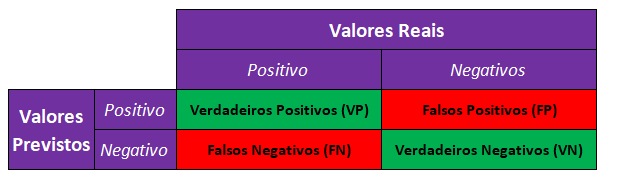

Os quadros elementos que fundamental a matriz são:
> 1 - **Verdadeiro Positivo (VP)**: Número de transações classificada pelo modelo como fraudulenta que são de fato fraudulentas.\
> 2 - **Verdadeiro Negativo (VN)**: Número de transações classificadas pelo modelo como fraudulentas que não são fraudulentas, transações legítimas que foram classificada erroneamente pelo modelo.\
> 3 - **Falso Positivo (FP)**: Número de transações classificadas pelo modelo como legítimas que são fraudulentas, transações fraudulentas que o modelo classificou como legítimas.\
> 4 - **Falso Negativo (FN)**: Número de transações classificadas pelo modelo como legítimas que de fato são legítimas.

### Métricas

Por meio da matriz de confusão podemos ter várias métricas possiveis para determinar se um modelo proposto tem um bom desempenho, são alguns métricas referenciados por essa matriz que utilizaremos: **Sensibilidade**, **Valor Preditivo Positivo** e **F1-Score**.

**Sensibilidade** (**recall** ou **taxa de verdadeiro positivo**)
> $Sensibilidade = \dfrac{VP}{VP+FN}$
> 
A sensibilidade consiste da razão entre a quantidade de valores que o modelo prévio como fraudulentos pelo total de transações fraudulentas, ou seja, percentual de transações fraudulentas que o modelo acertou.
\
\
**Valor Preditivo Positivo** ou **Precisão**
> $\text{Valor Preditivo Positivo} = \dfrac{VP}{VP+FP}$

O valor preditivo positivo consiste da razão do número de transações fraudulentas classificadas corretamente pelo total de transações classificas pelo modelo como fraude.
Diante dessas métricas desejamos um valor alto de **sensibilidade** e **Precisão**, podemos combinar essas duas no métricas **F1-Score** o valor máximo do F1-Score corresponde 1, isso quando a sensibilidade e precisão tem seus valores máximos. Por essa caracteristica selecioremos o F1-Score como métrica definitiva para decidi o algorítimo sera selecionado.
\
\
**F1-Score** corresponde a média harmônica entre **Sensibilidade** e **Valor Preditivo Positivo**
> $\text{F1-Score} = \dfrac{2}{\dfrac{1}{\text{Sensibilidade}}+\dfrac{1}{\text{Valor Preditivo Positivo}}} = \dfrac{2\cdot\text{Sensibilidade}\cdot\text{Valor Preditivo Positivo}}{\text{Sensibilidade}+\text{Valor Preditivo Positivo}}$

\
Existem diversas outras métricas para definimos ao final o modelo a se utilizado como **Especificidade (Specificity)**, **Área sob a Curva ROC (AUC-ROC)** ou **Erro Quadrático Médio (Mean Squared Error ou MSE)**, entretanto vamos nos até principalmente a **F1-Score**.

## Base de Treino e Validação

Para construção do modelos devemos separar os dados disponiveis em dois grupos de dados, um destinado a construção do modelo e outro a sua validação/avaliação do modelo proposto. Devemos ter em mente que ambos grupos de dados devem apresenta a mesma proporção entre dados fraudulentos e legítimos.
[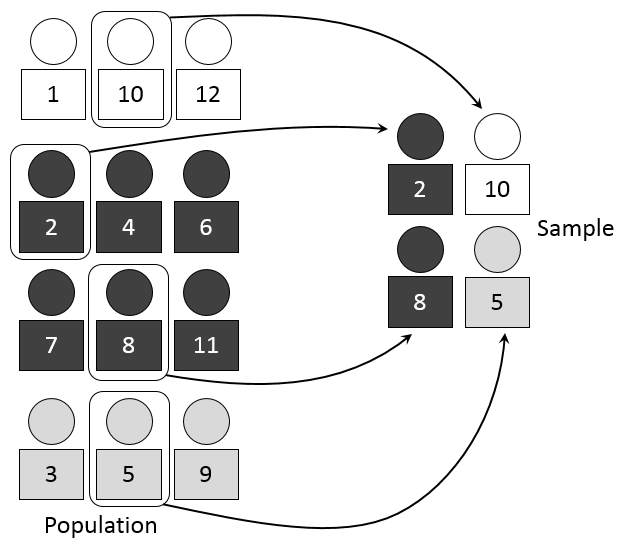](https://pt.wikipedia.org/wiki/Amostragem_estratificada)\
Separaremos os dois grupos por meio de um processo de amostragem estratificada simple, acerca disso construiremos uma função que faça a construção dos dois DataFrame a partir da catégoria `Class`.

In [13]:
# Função para estratificação simples
def estratificacao_simples(dados,tamanho):
    '''
    Retorna dois dataframes estratificados

    Paramêtros:
    Dados: dataFrame que será estratificado
    tamanho: tamanho desejado da estratificação, tamanho da amostrar

    Retorna:
    Um tupla no formanto (treino, validação)
    '''
    #Percentual dos dados
    percentual = dados["Class"].value_counts("normalizer")

    #Tamanho das estratificação
    n = int(tamanho*percentual[0]) #Quantidade de transações legítimas
    m = tamanho - n #Quantidade de transações fraudulentas

    #Solteando os elementos de cada class
    zeros = dados.query("Class==0").sample(n) #Elementos legítimos
    uns = dados.query("Class==1").sample(m) #Elementos Fraudulentos

    #DataFrame de Treino e Validação
    validacao = pd.concat([zeros,uns]) #Unificação dos elementos solteados em um único dataframe
    treino = dados.drop(validacao.index) #Excluir elementos solteados do dataframe original

    #Nova indexização dos dataframe de treino e validação
    validacao.index = range(len(validacao))
    treino.index = range(len(treino))

    return treino, validacao

### Dados Desbalanceados
Denominamos de classe majoritária a que possui a maior quantidade de dados, representando as transações não fraudulentas, enquanto chamamos de classe minoritária as transações fraudulentas, que têm a menor quantidade de dados. Para lidar com o desequilíbrio na quantidade de dados disponíveis, aplicaremos duas técnicas:
>***Undersampling***: Consiste na eliminação de dados presentes na classe majoritária até que a mesma tenham uma quantidade próxima de dados a classe minoritária.  

>***Oversampling***: Consiste na adição de dados na classe minoritária até que a mesma tenham uma quantidade próxima de dados a classe majoritária.

[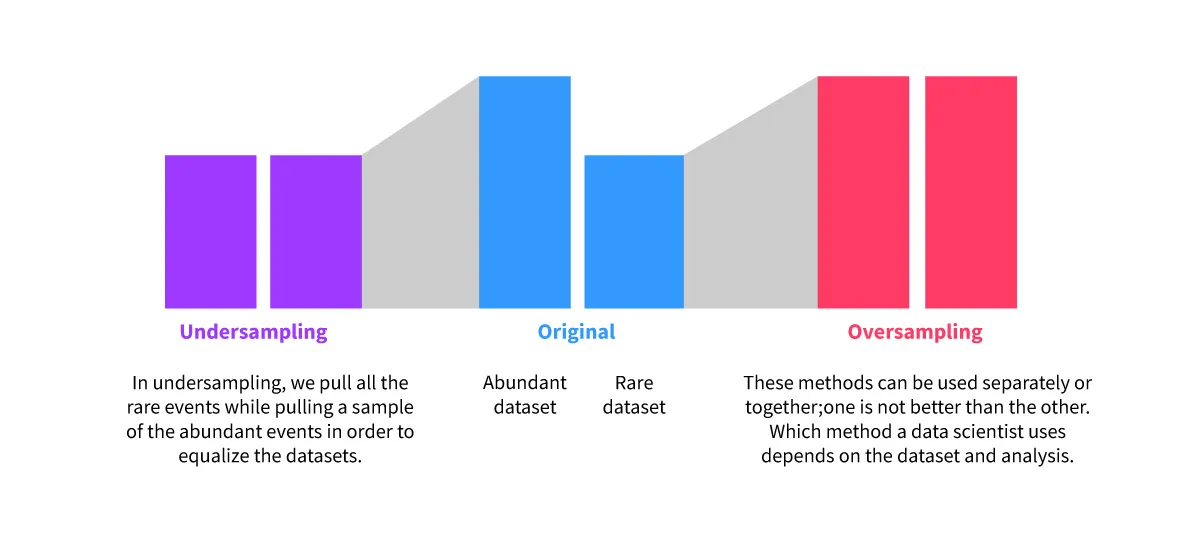](https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/)

In [14]:
#Função para undersampling
def undersampling(dados):
    '''
    Retorna um undersampling dos dados, classe majoritária tem o mesmo tamanho da minoritária

    Paramêtros:
    Dados: dataframe com dados a serem realizados um undersampling

    Retorno:
    dataFrame: Tem como resultado uma dataframe menor que de entrada sem qualquer repetição de elementos
    '''
    #Separado as classes
    tamanho_classe_minoritaria = len(dados.query('Class==1'))
    tamanho_classe_majoritaria = len(dados.query('Class==0'))

    #Solteando elementos da classe majoritaria
    elementos_majoritarios = dados.query('Class==0').sample(tamanho_classe_minoritaria)

    #Separado elementos minoritarios dos dados
    elementos_minoritarios = dados.query('Class==1')

    #Juntado os elementos
    undersampling = pd.concat([elementos_majoritarios,elementos_minoritarios])

    #Reorganizar os index
    undersampling.index = range(len(undersampling))
    
    return undersampling

In [15]:
undersampling(dados)['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [16]:
#Função para oversampling
def oversampling(dados):
    '''
    Retorna um oversampling dos dados, classe minoritária tem o mesmo tamanho da classe majoritária

    Paramêtros:
    Dados: Dataframe que será realizado o oversampling

    Retorno:
    DataFrame: O resultado é um DataFrame com as mesmas dimensões do de entrada com repetição de elementos da classe minoritária
    '''
    #Separado as classes
    tamanho_classe_majoritaria = len(dados.query('Class==0'))
    tamanho_classe_minoritaria = len(dados.query('Class==1'))
    
    #Soltendo elementos das classes
    elementos_majoritarios = dados.query('Class==0')
    elementos_minoritarios = dados.query('Class==1').sample(tamanho_classe_majoritaria, replace = True)
    
    #Juntados os elementos
    oversampling = pd.concat([elementos_minoritarios,elementos_majoritarios])
    
    #Reorganizar os index
    oversampling.index = range(len(oversampling))
    
    return oversampling

In [17]:
oversampling(dados)['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

Mesclado o conceito de undersampling e oversamplig para formar uma unica função, `under_over`, essa função tem como resultado um dataframe de mesmo tamanho de entrada, entretanto permiter controla o percentual de dados relativos a classe majoritária e minoritária.

In [18]:
#Função para undersampling e Oversampling
def under_over(dados,percentual):
    '''
    Retorna um dataframe do mesmo tamanho do dataframe de entrada, sendo que foi realizado um undersampling e Oversampling no dataframe original
    
    Paramentros:
    dados: Corresponde ao dataframe
    Percentual: Tamanho percentual desejado da classe majoritária

    Retorno:
    DataFrame: Se percentual exigido for maior que percentual da classe majoritária no 'original' havera elementos repetidos dessa classe
    caso contrário havera elementos repetidos da classe minoritária
    '''
    #Separado as classes
    tamanho_classe_majoritaria = len(dados.query('Class==0'))
    tamanho_classe_minoritaria = len(dados.query('Class==1'))

    #Definido quantidade de elementos das classes no novo dataframe
    if len(dados)*percentual <= tamanho_classe_majoritaria:
        elementos_majoritarios = dados.query('Class==0').sample(int(len(dados)*percentual))
        elementos_minoritarios = dados.query('Class==1').sample(int(len(dados)*(1-percentual)), replace = True)
    else:
        elementos_majoritarios = dados.query('Class==0').sample(int(len(dados)*percentual), replace = True)
        elementos_minoritarios = dados.query('Class==1').sample(int(len(dados)*(1-percentual)))

    #Concatenação dos elementos
    under_over = pd.concat([elementos_majoritarios,elementos_minoritarios])

    #Reorganização dos elementos
    under_over.index = range(len(under_over))

    return under_over

In [19]:
#Verificando se função vai apresentar 70% de dados da classe majoritaria
under_over(dados,percentual=0.7)['Class'].value_counts(normalize=True)

Class
0    0.699898
1    0.300102
Name: proportion, dtype: float64

## Modelagem pelo Sciki-learn

Recorrendo a [Scikit-Learn](https://scikit-learn.org/stable/index.html) biblioteca comumente utilizada para treina, desenvolver e validar modelos estatísticos e de machine learning.    
Entre os diversos tipos de modelos presentes na biblioteca sejam ele de classificação, o grupo de modelos que nos interessa, regressão e clusterização optamos pelos cincos mais comuns de serem utilizados

Index|Modelo
|:--:|:--|
|1|[Regressão Logística](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)|
|2|[Árvores de Decisão](https://scikit-learn.org/stable/modules/tree.html)|
|3|[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)|
|4|[Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/svm.html#)|
|5|[K-Nearest Neighbors (KNN)](https://scikit-learn.org/stable/modules/neighbors.html)|

In [20]:
#Função separa os dados que serão utilizados para treinamento e avaliação dos modelos
def conjuntos_treino_validacao(dados,tamanho):
    '''
    Retorna uma lista com os dados de treino e teste(validação do modelo)

    Paramêtros:
    dados: Corresponde as dados brutos que serão separados para treino e validação
    tamanho: Corresponde tamanho dos dados que serão separados para avaliação do modelo

    Retorno:
    [treino_x,treino_y,teste_x,teste_y]
    treino_x e treino_y: corresponde ao dados que serão utilizados para treinamento sendo paramêtros de entrada e seus respectivos valores de saída
    teste_x e teste_y: corresponde ao dados que foram separados para obter as métricas de validação do modelo
    '''

    #Separar os dados "brutos" para teste e treino
    treino, teste = estratificacao_simples(dados, tamanho)

    #Conjuntos para treino
    treino_x = treino[treino.columns[:30]].values
    treino_y = treino["Class"].values
    
    #Conjuntos para validação
    teste_x = teste[teste.columns[:30]].values
    teste_y = teste["Class"].values

    return [treino_x,treino_y,teste_x,teste_y]

### Treinando os modelos

In [21]:
#Importação dos modelos para treino
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Pontuação dos modelos
from sklearn.metrics import precision_score#Valor preditivo positivo
from sklearn.metrics import recall_score#Sensibilidade
from sklearn.metrics import f1_score#F1-Score

In [22]:
# Criar instâncias dos modelos
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC()

#Lista de modelos
modelos = [logistic_regression, knn, svm, decision_tree, random_forest]

In [ ]:
#Tipo de modelo e seus indicadores em uma matriz
def resultados(modelos,treino_teste):
    '''
    Retorna o tipo de modelo e métricas deles

    Paramêtros:
    modelos: Uma lista de modelos que serão treinados
    treino_teste: Uma lista onde se encontram os dados para treino e teste(avaliação do modelo) no formanto [treino_x,treino_y,teste_x,teste_y]

    Retorno:
    Uma lista de tuplas no formato [(tipo de modelo, valor preditivo, Sensibilidade, F1-Score)]
    '''
    resultados = []
    
    for modelo in modelos:
        modelo = modelo.fit(treino_teste[0],treino_teste[1])
        previsao = modelo.predict(treino_teste[2])
        resultados.append((str(modelo),
                           recall_score(treino_teste[3],previsao),
                           precision_score(treino_teste[3],previsao),
                           f1_score(treino_teste[3],previsao)
                          )
                         )

    return resultados

In [ ]:
tamanho = 200

In [ ]:
#Dados originais
treino_teste = conjuntos_treino_validacao(dados,tamanho)
resultados_dados = resultados(modelos,treino_teste)

In [ ]:
#Dados normalizados
treino_teste = conjuntos_treino_validacao(normalizados,tamanho)
resultados_normalizados = resultados(modelos,treino_teste)

In [ ]:
#dados padronizados
treino_teste = conjuntos_treino_validacao(padronizados,tamanho)
resultados_padronizados = resultados(modelos,treino_teste)
resultados_padronizados

## Aplicando o Undersampling e Oversampling nos modelos propostos

In [ ]:
def resultados_under_Over(dados, modelos, tamanho, percentuais):
    '''
    Retorna o tipo de modelo e suas métricas de avaliação aplicado Undersampling e Oversampling

    Paramêtros:
    Dados: DataFrame que serã utilizado treina e avaliação dos modelos
    Modelos: Lista com os tipos de modelos que serão treinados
    Tamanho: tamanho desejado da estratificação, tamanho da amostrar. dados que serão utilizados para fazer a avaliação do modelo
    Percentuais: Lista com os percentuais dos dados da classe majoritárias que serão treinados

    Retorno:
    Uma lista de tuplas no formanto [(percentual,[(modelo, valor preditivo, Sensibilidade, F1-Score)])]
    '''
    lista = []
    
    #Separa os dados para treino a avaliação de acordo como os percentuais informandos
    for percentual in percentuais:
        treino_teste = conjuntos_treino_validacao(under_over(dados,percentual),tamanho)
        final = resultados(modelos,treino_teste) #Treina os modelos de acordo com os percentuais inseridos
        lista.append((percentual,final))
    
    return lista

In [ ]:
resultados = resultados_under_Over(dados,modelos,tamanho,percentuais=[0.25,0.5,0.75])

In [ ]:
import json

with open("E:/Credit_Card_Fraud_Detection/resultados.json",'w') as f_obj:
    json.dump(resultados,f_obj)

In [ ]:
resultados

## Conclusões